<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from numpy import linalg
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from math import exp
import  math

In [20]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.40, random_state=15)
X_test, X_cv,y_test,y_cv=train_test_split(X_test,y_test, test_size=.50, random_state=15)


### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [29]:
# you can write your code here
clf = SVC(gamma=0.001, C=100)
clf.fit(X_train,y_train)
support_vectors=clf.support_vectors_
intercept=clf.intercept_
dual_coe=clf.dual_coef_

def kernal(mat1, mat2, gamma):
    
    k=exp(-gamma*np.sum((mat1-mat2)**2))
    

    return k


gamma=0.001
def decision_function(gamma,X_cv,dual_coe,intercept,support_vectors):
        result_dec_fn=[]
        for j in X_cv:
            tmp=0
            for i,k in zip(support_vectors,dual_coe[0]):
               Ker=kernal(i,j,gamma)
               tmp+=(k*Ker)
            tmp=tmp+intercept 
            result_dec_fn.append(tmp)    
        return result_dec_fn
           
result_dec_functn=decision_function(gamma,X_cv,dual_coe,intercept,support_vectors)
result_list=list(i[0] for i in result_dec_functn)
print("output of decision funcation " ,result_list[0:10])
F_cv =[]
for i in result_list:
    if i>0:
        F_cv.append(1)
    else:
        F_cv.append(0)       

print("output of model ",clf.decision_function(X_cv)[0:10])


output of decision funcation  [-2.15980217966647, -2.6315643052289905, -3.610567063094037, 1.9254014334365632, -0.9839950024528423, -1.84103624132939, -3.0473972987289804, -0.9108054741150926, -1.0738614096121768, -2.8494875264428563]
output of model  [-2.15980218 -2.63156431 -3.61056706  1.92540143 -0.983995   -1.84103624
 -3.0473973  -0.91080547 -1.07386141 -2.84948753]


<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

In [30]:
no_of_plus=np.count_nonzero(y_train==1)
no_of_minus=np.count_nonzero(y_train==0)

y_plus=(no_of_plus+1)/(no_of_minus+2)
y_minus=1/(no_of_minus+2)

In [31]:
def predict(y_cv):
    y_cv_predict=np.where(y_cv==0,y_minus,y_plus)
    return y_cv_predict

y_cv_pred=predict(y_cv)  

F_test=clf.decision_function(X_test)

In [33]:
def initialize_weights(dim):
   w=np.zeros_like(dim)
   b=0
   return w,b

def sigmoid(z):
 sig_z=(1/(1+np.exp(-z)))
 return sig_z

def logloss(y_true,y_pred): 

   loss =0
   for i in range(len(y_true)):
       temp=y_true[i]*math.log10(y_pred[i])+(1-y_true[i])*math.log10(1-y_pred[i])
       loss+=temp
   loss=(-1*loss)/len(y_true)
   return loss

def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw=x*(y-sigmoid(np.dot(w,x)+b)) -(alpha/N)*w
    return dw

def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    db=y-(sigmoid(np.dot(w,x)+b))
    return db

def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    w,b = initialize_weights(X_train[0])
    train_loss = []
    test_loss = []
    for e in range(epochs):
       
        for x,y in zip(X_train,y_train):
            dw = gradient_dw(x,y,w,b,alpha,N)
            db = gradient_db(x,y,w,b)
            w = w + (eta0 * dw)
            b = b + (eta0 * db)
        
        train_pred = []
        
        for i in X_train:
            y_pred= sigmoid(np.dot(w,i) + b)
            train_pred.append(y_pred)
        loss1=logloss(y_train, train_pred)
        train_loss.append(loss1) 
        
        
    return w,b,train_loss


alpha=0.0001
eta0=0.0001
N=len(result_list)
epochs=100
w,b,train_loss=train(result_list,y_cv_pred ,F_test,y_test,epochs,alpha,eta0)
print("W={}  intercept={}".format(w,b))

print("train_loss =",train_loss)

W=0.7836275055532742  intercept=-1.1641575400972337
train_loss = [0.2738898730674267, 0.25292270156343827, 0.23653510496818148, 0.223538334974367, 0.21306885628487032, 0.20450422190302345, 0.1973944243909419, 0.19141126585906384, 0.18631259588648674, 0.18191745822119545, 0.1780888604132711, 0.17472176924067384, 0.17173467282292865, 0.16906358533578106, 0.16665773729347866, 0.16447644049690363, 0.16248678059572427, 0.16066189939558828, 0.1589797022027556, 0.15742187492274887, 0.15597312933760984, 0.15462061821151918, 0.15335347804529983, 0.15216246867761588, 0.15103968701810322, 0.14997833800423616, 0.1489725500831522, 0.14801722559971103, 0.14710791874588794, 0.14624073541959998, 0.145412250611909, 0.1446194399029328, 0.1438596223794855, 0.14313041284987219, 0.1424296816658115, 0.14175552079947107, 0.14110621508807586, 0.14048021776675423, 0.1398761295750996, 0.13929268085409002, 0.13872871615493573, 0.13818318096579313, 0.13765511023041202, 0.13714361838808004, 0.1366478907092743, 0.1

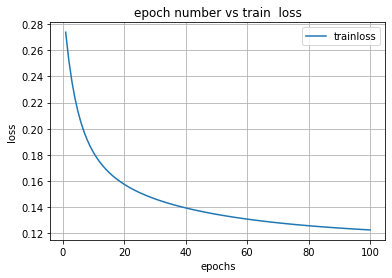

In [34]:
import matplotlib.pyplot as plt

epochs=list(range(1,101))
plt.plot(epochs, train_loss, label="trainloss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("epoch number vs train  loss")
plt.grid()
plt.show()


__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
